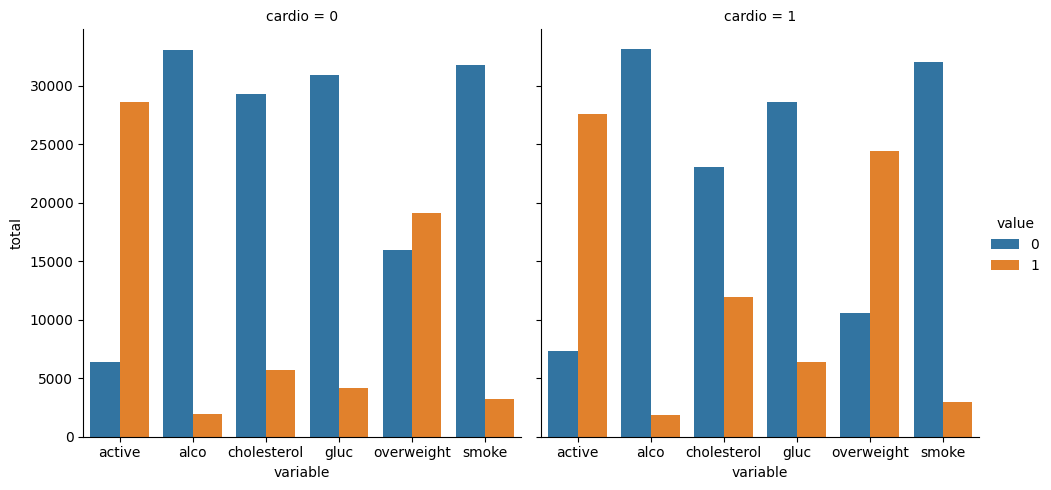

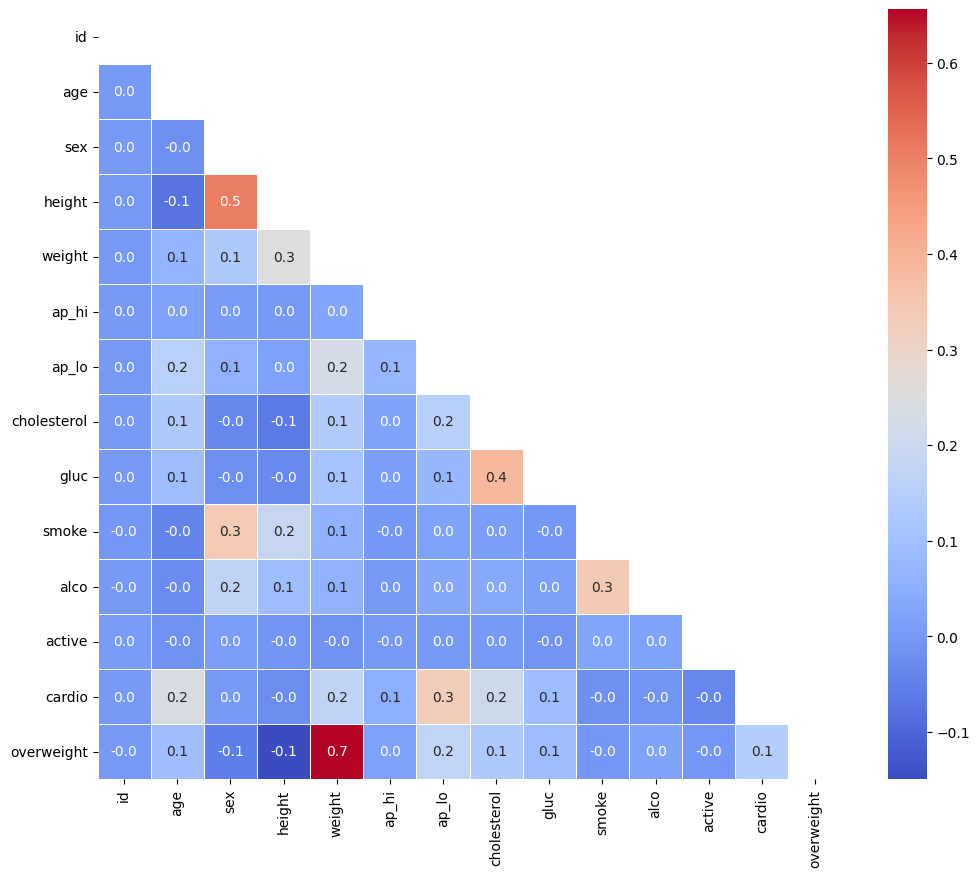

In [3]:
# Importação das bibliotecas necessárias para a análise e visualização dos dados.
import pandas as pd  # Para manipulação de dados.
import seaborn as sns  # Para visualização de dados.
import matplotlib.pyplot as plt  # Para geração de gráficos.
import numpy as np  # Para operações numéricas e criação de matrizes.

# 1. Carregando os dados do arquivo CSV.
# Este arquivo deve estar no mesmo diretório do notebook ou você pode especificar o caminho completo.
df = pd.read_csv('medical_examination.csv')

# 2. Criando uma coluna 'overweight' para indicar se o paciente está acima do peso.
# Calcula o Índice de Massa Corporal (IMC) como peso (kg) dividido pela altura ao quadrado (m^2).
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2).apply(lambda x: 1 if x > 25 else 0)

# 3. Normalizando os dados para as colunas 'cholesterol' e 'gluc'.
# Se o valor for 1 (normal), transforma para 0 (bom).
# Se o valor for maior que 1 (acima do normal), transforma para 1 (ruim).
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

# 4. Criando o gráfico categórico.
def draw_cat_plot():
    """
    Esta função cria um gráfico categórico que mostra a contagem de cada variável
    categórica (cholesterol, gluc, smoke, alco, active e overweight) para pacientes
    com e sem doenças cardiovasculares.
    """
    # Convertendo o dataframe para um formato longo utilizando a função pd.melt.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

    # Agrupando os dados por 'cardio', 'variable' e 'value' e contando as ocorrências.
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    # Criando o gráfico utilizando o seaborn catplot.
    # Divide o gráfico por cardio (painel da esquerda para cardio=0 e da direita para cardio=1).
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar').fig

    # Retornando a figura gerada.
    return fig

# 5. Criando o gráfico de correlação.
def draw_heat_map():
    """
    Esta função cria um mapa de calor (heatmap) que mostra a correlação entre diferentes variáveis
    do dataset. A correlação é uma medida que indica o quanto duas variáveis estão relacionadas.
    """
    # Filtrando os dados para remover valores incorretos:
    # - Pressão diastólica maior que a sistólica
    # - Altura e peso fora do intervalo percentil 2.5 a 97.5
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Calculando a matriz de correlação
    corr = df_heat.corr()

    # Gerando a máscara para ocultar a parte superior do triângulo
    mask = np.triu(corr)

    # Configurando a figura do matplotlib
    fig, ax = plt.subplots(figsize=(12, 10))

    # Criando o mapa de calor (heatmap) utilizando seaborn
    sns.heatmap(corr, annot=True, mask=mask, fmt='.1f', ax=ax, cmap='coolwarm', linewidths=0.5)

    # Retornando a figura gerada.
    return fig

# Testando as funções de visualização
# Gerando o gráfico categórico
cat_plot_figure = draw_cat_plot()
plt.show(cat_plot_figure)  # Exibindo o gráfico categórico

# Gerando o mapa de calor
heat_map_figure = draw_heat_map()
plt.show(heat_map_figure)  # Exibindo o mapa de calor
